In [104]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [105]:
df=pd.read_csv("Coffe_sales.csv")
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,3/1/2024,15:50.5
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,3/1/2024,19:22.5
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,3/1/2024,20:18.1
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,3/1/2024,46:33.0
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,3/1/2024,48:14.6


In [106]:
print(df.shape)
display(df.columns)

(3547, 11)


Index(['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day',
       'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time'],
      dtype='object')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [108]:
df.isnull().sum()

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

In [109]:
df.duplicated().sum()

np.int64(0)

In [110]:
coffee_name=df['coffee_name'].value_counts()
coffee_name

coffee_name
Americano with Milk    809
Latte                  757
Americano              564
Cappuccino             486
Cortado                287
Hot Chocolate          276
Cocoa                  239
Espresso               129
Name: count, dtype: int64

array(['Morning', 'Afternoon', 'Night'], dtype=object)

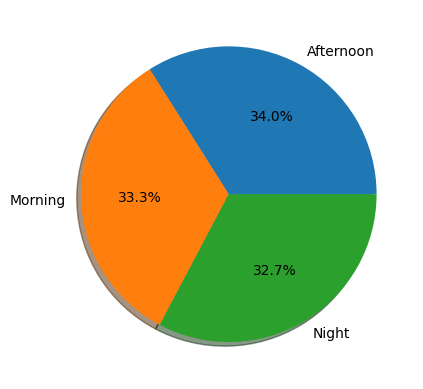

In [111]:
display(df['Time_of_Day'].unique())
count=df['Time_of_Day'].value_counts()
plt.pie(count, labels=count.index,autopct='%1.1f%%',shadow=True)
plt.show()

In [112]:
df['Date']=pd.to_datetime(df['Date'])
df['Time'] = df['Time'].astype(str).str.replace('.', ':', regex=False)
df['Time']=pd.to_datetime(df['Time'],errors='coerce',format='%H:%M:%S')
df['Time']=df['Time'].dt.time

In [113]:
df['Weekend_flag'] = df['Weekday'].apply(lambda x: 1 if x in ['Sat', 'Sun'] else 0)
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,Weekend_flag
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,15:50:05,0
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,19:22:05,0
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,20:18:01,0
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,NaT,0
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,NaT,0


In [114]:
week_flag=df['Weekend_flag'].value_counts()
display(week_flag)

Weekend_flag
0    2658
1     889
Name: count, dtype: int64

In [115]:
revenue = df.groupby(['Date', 'coffee_name'])['money'].sum().reset_index()
display(revenue)

,Date,coffee_name,money
0,2024-03-01,Americano,28.90
1,2024-03-01,Americano with Milk,135.20
2,2024-03-01,Cocoa,38.70
3,2024-03-01,Hot Chocolate,116.10
4,2024-03-01,Latte,77.40
...,...,...,...
1671,2025-03-22,Latte,35.76
1672,2025-03-23,Americano,25.96
1673,2025-03-23,Cappuccino,35.76
1674,2025-03-23,Cocoa,71.52


coffee_name
Latte                  26875.30
Americano with Milk    24751.12
Cappuccino             17439.14
Americano              14650.26
Hot Chocolate           9933.46
Name: money, dtype: float64


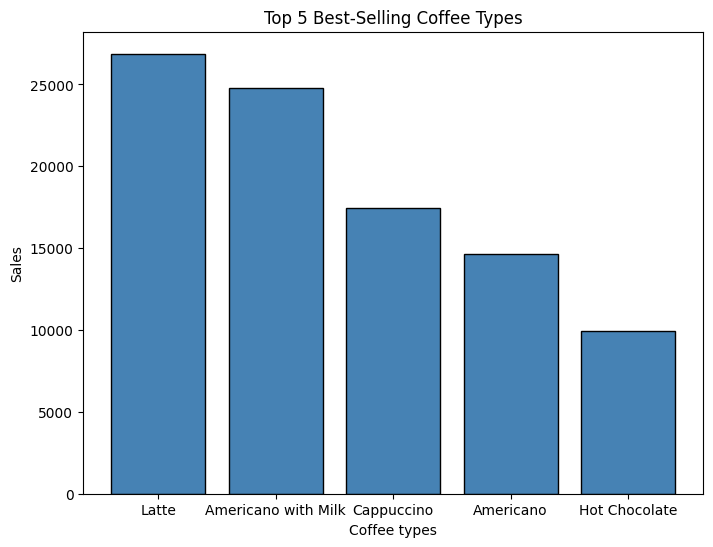

In [116]:
top_coffees = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False).head(5)
print(top_coffees)
plt.figure(figsize=(8,6))
plt.bar(top_coffees.index,top_coffees.values,color='steelblue',edgecolor='black')
plt.title("Top 5 Best-Selling Coffee Types")
plt.xlabel("Coffee types")
plt.ylabel("Sales")
plt.show()

Correlation between hour_of_day and money: 0.20274793514276118


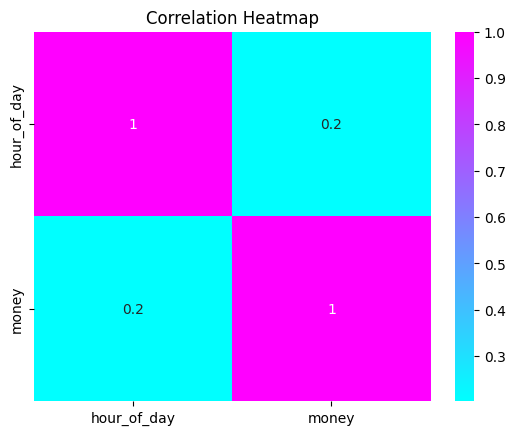

In [117]:
corr = df[['hour_of_day', 'money']].corr()
print("Correlation between hour_of_day and money:", corr.loc['hour_of_day','money'])
sns.heatmap(corr, annot=True,cmap='cool')
plt.title('Correlation Heatmap')
plt.show()

Month_name
Jan     6398.86
Feb    13215.48
Mar    15891.64
Apr     5719.56
May     8164.42
Jun     7617.76
Jul     6915.94
Aug     7613.84
Sep     9988.64
Oct    13891.16
Nov     8590.54
Dec     8237.74
Name: money, dtype: float64

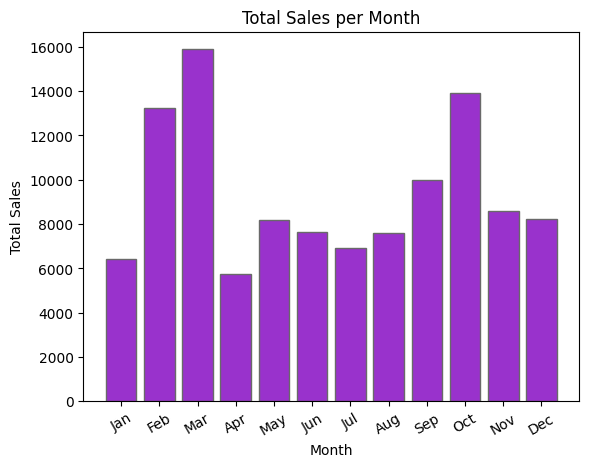

In [118]:
sales_month = df.groupby('Month_name')['money'].sum()
mon_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sales_month = sales_month.reindex(mon_order)
display(sales_month)
plt.bar(sales_month.index,sales_month.values,color='darkorchid',edgecolor='dimgray')
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=30)
plt.show()

In [119]:
sales_change = sales_month.diff()
print(sales_change)

Month_name
Jan         NaN
Feb     6816.62
Mar     2676.16
Apr   -10172.08
May     2444.86
Jun     -546.66
Jul     -701.82
Aug      697.90
Sep     2374.80
Oct     3902.52
Nov    -5300.62
Dec     -352.80
Name: money, dtype: float64


In [120]:
hourly_sales = df.groupby('hour_of_day')['money'].sum()
display(hourly_sales)
hourly_change=hourly_sales.diff()
display(hourly_change)

hour_of_day
6       149.40
7      2846.02
8      7017.88
9      7264.28
10    10198.52
11     8453.10
12     7419.62
13     7028.76
14     7173.80
15     7476.02
16     9031.84
17     7659.76
18     7162.60
19     7751.96
20     5578.92
21     6397.94
22     3635.16
Name: money, dtype: float64

hour_of_day
6         NaN
7     2696.62
8     4171.86
9      246.40
10    2934.24
11   -1745.42
12   -1033.48
13    -390.86
14     145.04
15     302.22
16    1555.82
17   -1372.08
18    -497.16
19     589.36
20   -2173.04
21     819.02
22   -2762.78
Name: money, dtype: float64

In [121]:
money_vec = df['money'].values
hour_vec = df['hour_of_day'].values
weekday_vec = df['Weekdaysort'].values
dot_money_hour = np.dot(money_vec, hour_vec)
dot_money_weekday = np.dot(money_vec, weekday_vec)
print("money·hour_of_day:", dot_money_hour)
print("money·weekdaysort:", dot_money_weekday)

money·hour_of_day: 1607140.28
money·weekdaysort: 431083.67999999964


In [122]:
df['money'].describe()

count    3547.000000
mean       31.645216
std         4.877754
min        18.120000
25%        27.920000
50%        32.820000
75%        35.760000
max        38.700000
Name: money, dtype: float64

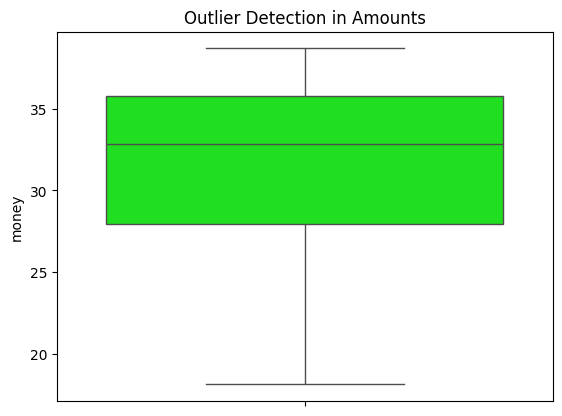

In [123]:
sns.boxplot(df['money'], color='lime')
plt.title('Outlier Detection in Amounts')
plt.show()

In [124]:
p_latte_mrng = ((df['coffee_name']=='Latte') & (df['Time_of_Day']=='Afternoon')).mean()
print("P(Latte and Morning) =", p_latte_mrng)

P(Latte and Morning) = 0.07612066535100084


In [125]:
df=pd.get_dummies(df,columns=['coffee_name'],drop_first=True)
df.head()

,hour_of_day,cash_type,money,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,Weekend_flag,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte
0,10,card,38.7,Morning,Fri,Mar,5,3,2024-03-01,15:50:05,0,False,False,False,False,False,False,True
1,12,card,38.7,Afternoon,Fri,Mar,5,3,2024-03-01,19:22:05,0,False,False,False,False,False,True,False
2,12,card,38.7,Afternoon,Fri,Mar,5,3,2024-03-01,20:18:01,0,False,False,False,False,False,True,False
3,13,card,28.9,Afternoon,Fri,Mar,5,3,2024-03-01,NaT,0,False,False,False,False,False,False,False
4,13,card,38.7,Afternoon,Fri,Mar,5,3,2024-03-01,NaT,0,False,False,False,False,False,False,True


In [129]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Time_of_Day']=le.fit_transform(df['Time_of_Day'])
df.head()

,hour_of_day,cash_type,money,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,Weekend_flag,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte
0,10,card,38.7,1,Fri,Mar,5,3,2024-03-01,15:50:05,0,False,False,False,False,False,False,True
1,12,card,38.7,0,Fri,Mar,5,3,2024-03-01,19:22:05,0,False,False,False,False,False,True,False
2,12,card,38.7,0,Fri,Mar,5,3,2024-03-01,20:18:01,0,False,False,False,False,False,True,False
3,13,card,28.9,0,Fri,Mar,5,3,2024-03-01,NaT,0,False,False,False,False,False,False,False
4,13,card,38.7,0,Fri,Mar,5,3,2024-03-01,NaT,0,False,False,False,False,False,False,True


In [134]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
print(df['money'].min(),df['money'].max())
df['money_minmax'] = mms.fit_transform(df[['money']])
df.head()

18.12 38.7


,hour_of_day,cash_type,money,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,Weekend_flag,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte,money_minmax
0,10,card,38.7,1,Fri,Mar,5,3,2024-03-01,15:50:05,0,False,False,False,False,False,False,True,1.00000
1,12,card,38.7,0,Fri,Mar,5,3,2024-03-01,19:22:05,0,False,False,False,False,False,True,False,1.00000
2,12,card,38.7,0,Fri,Mar,5,3,2024-03-01,20:18:01,0,False,False,False,False,False,True,False,1.00000
3,13,card,28.9,0,Fri,Mar,5,3,2024-03-01,NaT,0,False,False,False,False,False,False,False,0.52381
4,13,card,38.7,0,Fri,Mar,5,3,2024-03-01,NaT,0,False,False,False,False,False,False,True,1.00000
